# MLT lab 1 - Grigoryev Mikhail, J4133c

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn import  datasets, metrics, tree 
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['font.size'] = 18
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
RNG = 42

## Fetch data

In [3]:
df = pd.read_csv("./bioresponse.csv", header=0, sep=',')
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = np.array(df['Activity'].values)
X = np.array(df.iloc[:, 1:])

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.25, random_state = RNG)

In [6]:
def get_metrics(name, Y_test, Y_pred, Y_pred_proba):
    pr = metrics.precision_score(Y_test, Y_pred)
    re = metrics.recall_score(Y_test, Y_pred)
    f1 = metrics.f1_score(Y_test, Y_pred)
    ac = metrics.accuracy_score(Y_test, Y_pred)
    ll = metrics.log_loss(Y_test, Y_pred_proba)

    print(name)
    print(f"Precision:\t{pr:.4f}\nRecall:  \t{re:.4f}\nAccuracy:\t{ac:.4f}")
    print(f"F1-score:\t{f1:.4f}\nLog-loss:\t{ll:.4f}")

In [7]:
def prec_rec_plot(name, Y_test, Y_pred):
    precision, recall, thresholds = metrics.precision_recall_curve(Y_test, Y_pred)

    plt.grid()
    plt.plot(precision, recall)
    plt.title(f"{name}, precision-recall");
    plt.ylabel("Recall");
    plt.xlabel("Precision");

In [8]:
def roc_plot(name, Y_test, Y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)

    plt.grid()
    plt.plot(fpr, tpr)
    plt.title(f"{name}, ROC curve");
    plt.ylabel("True positive rate");
    plt.xlabel("False positive rate");

## Deep DT

In [9]:
clf = tree.DecisionTreeClassifier(random_state=RNG)
clf.fit(X_train, Y_train); # no cell output

In [10]:
Y_pred = clf.predict(X_test)
Y_pred_proba = clf.predict_proba(X_test)
get_metrics("Deep DT", Y_test, Y_pred, Y_pred_proba)

Deep DT
Precision:	0.7500
Recall:  	0.7178
Accuracy:	0.7026
F1-score:	0.7335
Log-loss:	10.2733


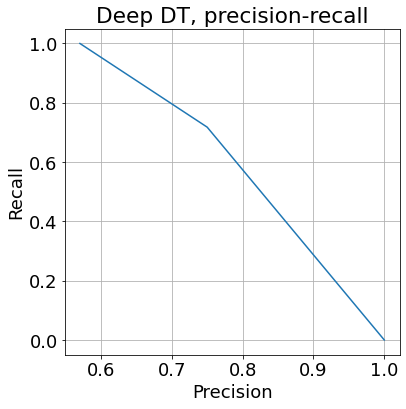

In [11]:
prec_rec_plot("Deep DT", Y_test, Y_pred)

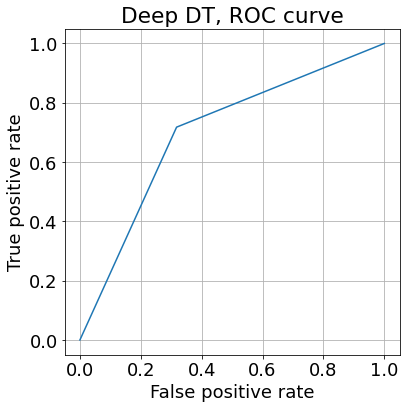

In [12]:
roc_plot("Deep DT", Y_test, Y_pred)

## Shallow DT

In [13]:
clf = tree.DecisionTreeClassifier(random_state=RNG, max_depth=2)
clf.fit(X_train, Y_train); # no cell output

In [14]:
Y_pred = clf.predict(X_test)
Y_pred_proba = clf.predict_proba(X_test)
get_metrics("Shallow DT", Y_test, Y_pred, Y_pred_proba)

Shallow DT
Precision:	0.7909
Recall:  	0.7776
Accuracy:	0.7559
F1-score:	0.7842
Log-loss:	0.5335


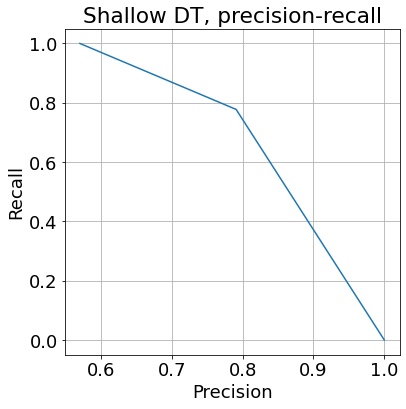

In [15]:
prec_rec_plot("Shallow DT", Y_test, Y_pred)

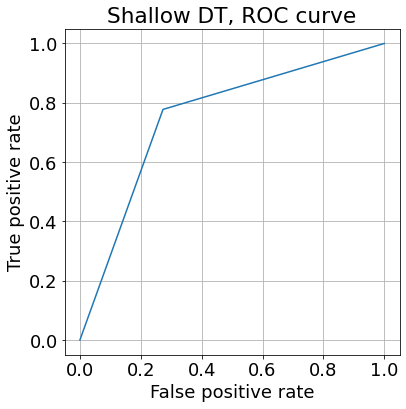

In [16]:
roc_plot("Shallow DT", Y_test, Y_pred)

## RF on deep DTs

In [17]:
rf_ddt = RandomForestClassifier(n_estimators=50, random_state=RNG)
rf_ddt.fit(X_train, Y_train); # no cell output

In [18]:
Y_pred = clf.predict(X_test)
Y_pred_proba = clf.predict_proba(X_test)
get_metrics("RF on deep DTs", Y_test, Y_pred, Y_pred_proba)

RF on deep DTs
Precision:	0.7909
Recall:  	0.7776
Accuracy:	0.7559
F1-score:	0.7842
Log-loss:	0.5335


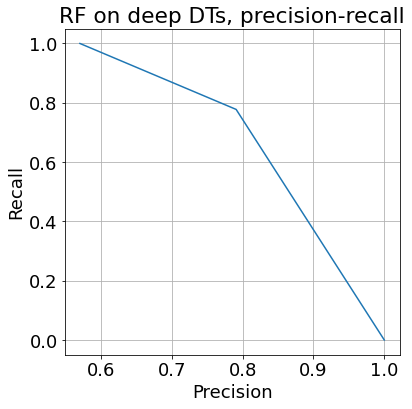

In [19]:
prec_rec_plot("RF on deep DTs", Y_test, Y_pred)

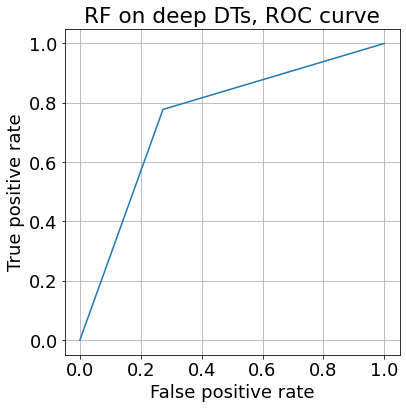

In [20]:
roc_plot("RF on deep DTs", Y_test, Y_pred)

## RF on shallow DTs

In [21]:
rf_sdt = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=RNG)
rf_sdt.fit(X_train, Y_train); # no cell output

In [22]:
Y_pred = clf.predict(X_test)
Y_pred_proba = clf.predict_proba(X_test)
get_metrics("RF on shallow DTs", Y_test, Y_pred, Y_pred_proba)

RF on shallow DTs
Precision:	0.7909
Recall:  	0.7776
Accuracy:	0.7559
F1-score:	0.7842
Log-loss:	0.5335


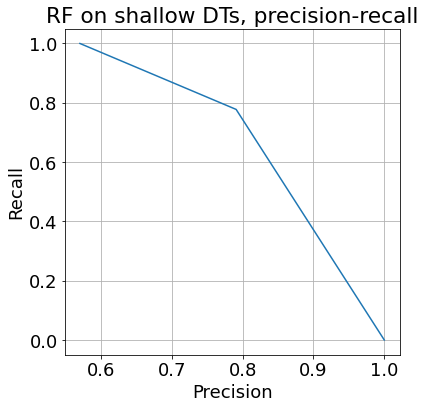

In [23]:
prec_rec_plot("RF on shallow DTs", Y_test, Y_pred)

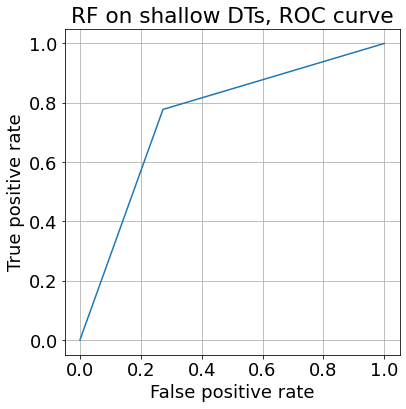

In [24]:
roc_plot("RF on shallow DTs", Y_test, Y_pred)

## No FN classifier

In [25]:
recalls = []
fnrs = []
thresholds = []

clf = tree.DecisionTreeClassifier(random_state=RNG,
                                      #class_weight={0: 0.1, 1: 0.9},
                                      criterion="entropy",
                                      max_depth=3)
clf.fit(X_train, Y_train); # no cell output
Y_pred_proba = clf.predict_proba(X_test)

for th in np.linspace(0.1, 0.4, 40):
    Y_pred = (Y_pred_proba[:,1] >= th).astype(bool)
    
    re = metrics.recall_score(Y_test, Y_pred)

    conf = metrics.confusion_matrix(Y_test, Y_pred)
    fnr = conf[1, 0] / conf.sum()
    
    recalls.append(re)
    fnrs.append(fnr)
    thresholds.append(th)

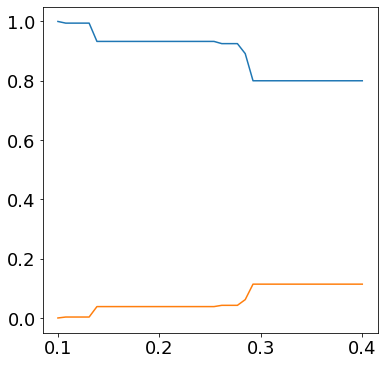

In [26]:
plt.plot(thresholds, recalls)
plt.plot(thresholds, fnrs)

We'll take the 0.13 threshold

In [27]:
th = 0.13
clf = tree.DecisionTreeClassifier(random_state=RNG,
                                      #class_weight={0: 0.1, 1: 0.9},
                                      criterion="entropy",
                                      max_depth=3)
clf.fit(X_train, Y_train); # no cell output
Y_pred_proba = clf.predict_proba(X_test)
Y_pred = (Y_pred_proba[:,1] >= th).astype(bool)

conf = metrics.confusion_matrix(Y_test, Y_pred)
fnr = conf[1, 0] / conf.sum()

get_metrics("No FN classifier", Y_test, Y_pred, Y_pred_proba)
print("\nConfusion matrix:\n", conf)
print(f"\nFNR:\t{fnr:.4f}")

No FN classifier
Precision:	0.5739
Recall:  	0.9944
Accuracy:	0.5757
F1-score:	0.7278
Log-loss:	0.5402

Confusion matrix:
 [[  8 395]
 [  3 532]]

FNR:	0.0032
